In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/건강검진/health_checkup/JDM/연도별_건강검진/건강검진_2017.csv")

In [3]:
data["Year_ID"] = data["YEAR"].astype(str) + "_" + data["ID"].astype(str)
cols = ['Year_ID'] + [col for col in data.columns if col != 'Year_ID']
data = data[cols]
data = data.drop(['ID', 'YEAR'], axis=1)

In [4]:
targets = ['OBESITY', 'DIABETES', 'HYPERTENSION', 'DYSLIPIDEMIA', 
               'LIVER_ABNORMAL', 'KIDNEY_ABNORMAL', 'ANEMIA']

In [5]:
df=data.drop(targets, axis=1)

In [6]:
input_features = ["HEIGHT", "WEIGHT", "WAIST","BP_HIGH", "BP_LWST", 
                  "BLDS","TOT_CHOLE", "TRIGLYCERIDE", "HDL_CHOLE", 
                  "LDL_CHOLE", "HMG", "OLIG_PROTE_CD",
                  "CREATININE", "SGOT_AST", "SGPT_ALT", "GAMMA_GTP", 
                  "SMK_STAT_TYPE_CD", "DRK_YN", "BMI"]

for col in input_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\anaconda3\envs\py312ff2\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\anaconda3\envs\py312ff2\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\anaconda3\envs\py312ff2\Lib\subprocess.py", line 1540, in _execute_child
    hp, ht, pid, tid =

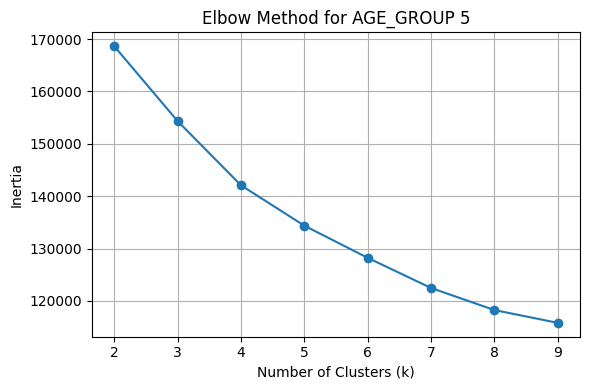

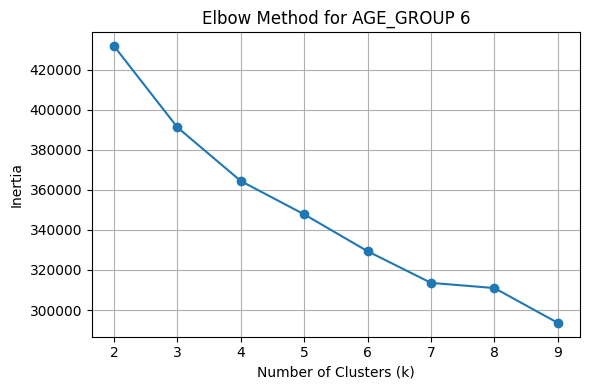

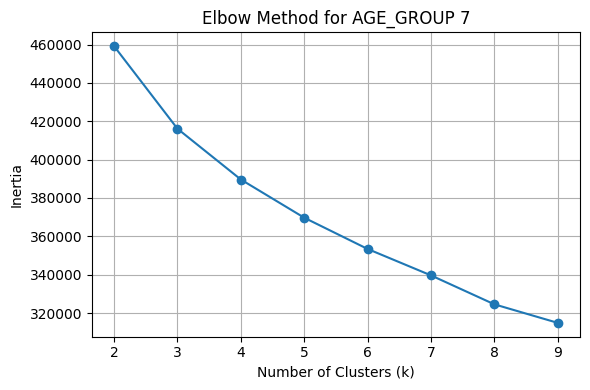

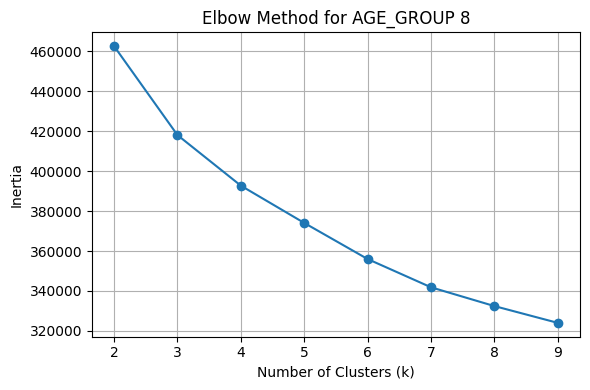

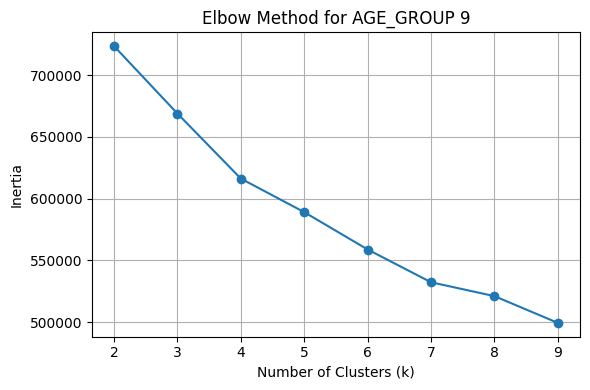

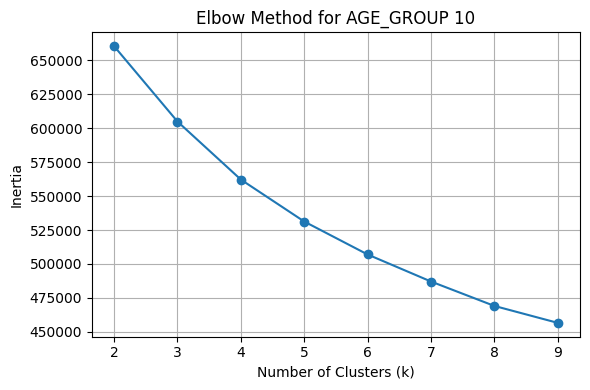

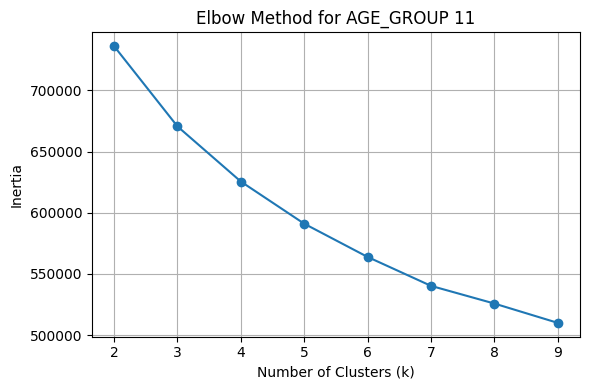

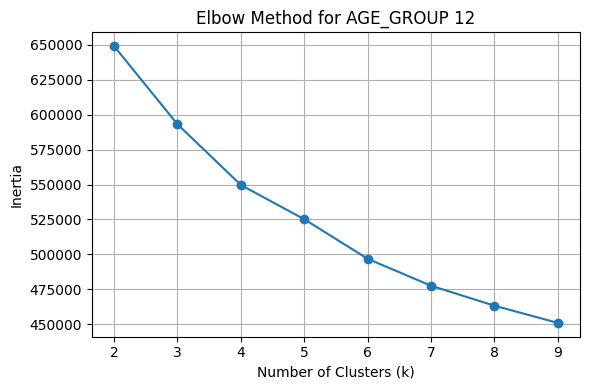

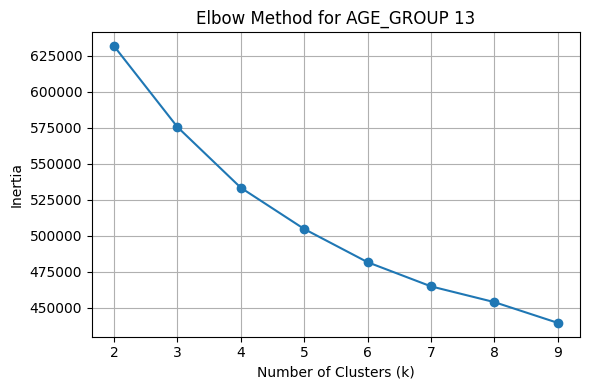

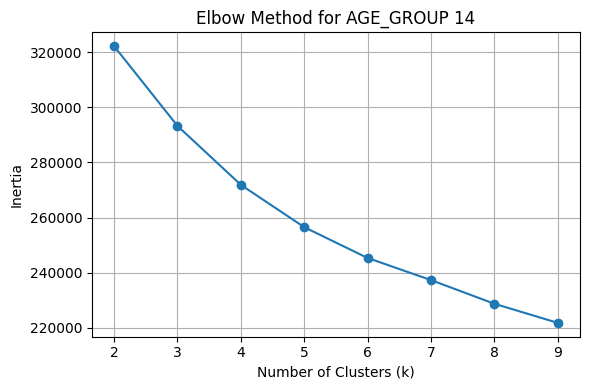

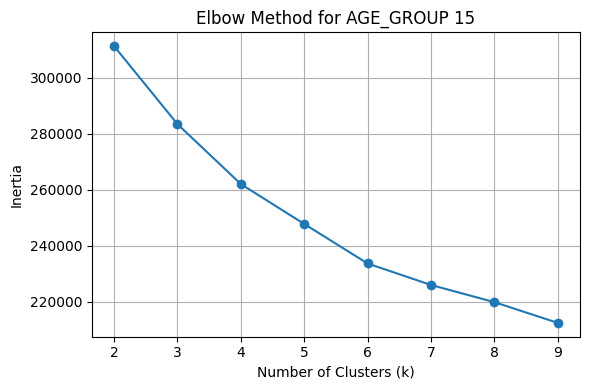

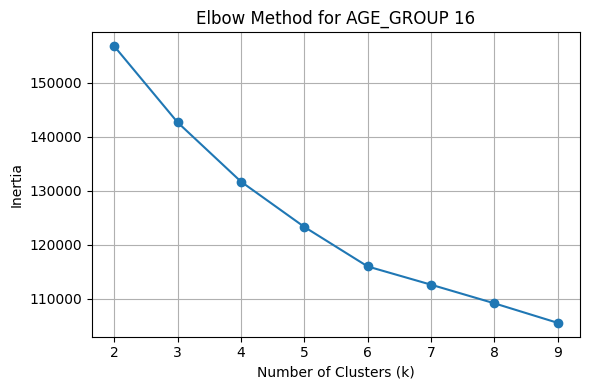

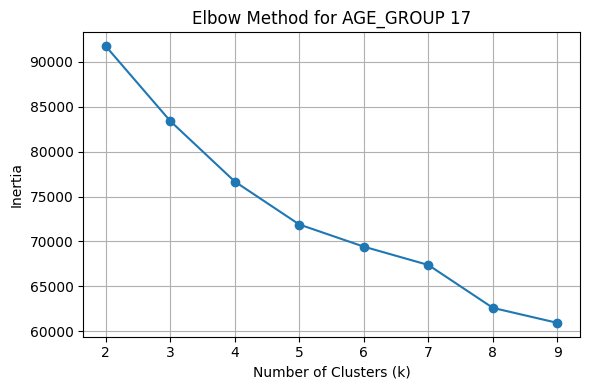

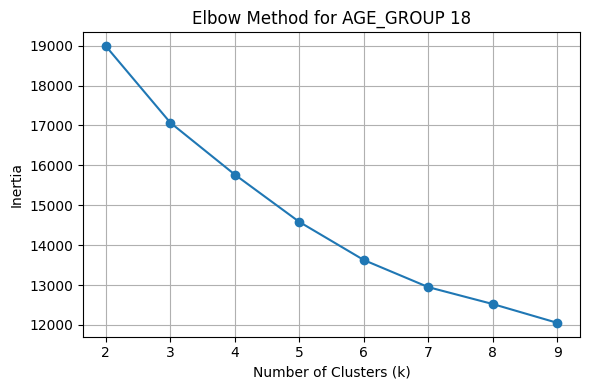

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
# 1. 사용할 건강 변수 목록
features = [
    'SEX', 'WAIST', 'BMI',
    'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE',
    'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP',
    'SMK_STAT_TYPE_CD', 'DRK_YN'
]
# 2. 연령대별로 KMeans 엘보우 분석
for age_group in sorted(df['AGE_GROUP'].unique()):
    df_age = df[df['AGE_GROUP'] == age_group].copy()
    df_age = df_age.dropna(subset=features)
    
    # 데이터가 너무 적으면 제외
    if len(df_age) < 50:
        continue
    
    # 정규화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_age[features])
    
    # 엘보우용 inertia 계산
    inertia = []
    K = range(2, 10)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
    # 시각화
    plt.figure(figsize=(6, 4))
    plt.plot(K, inertia, marker='o')
    plt.title(f'Elbow Method for AGE_GROUP {age_group}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

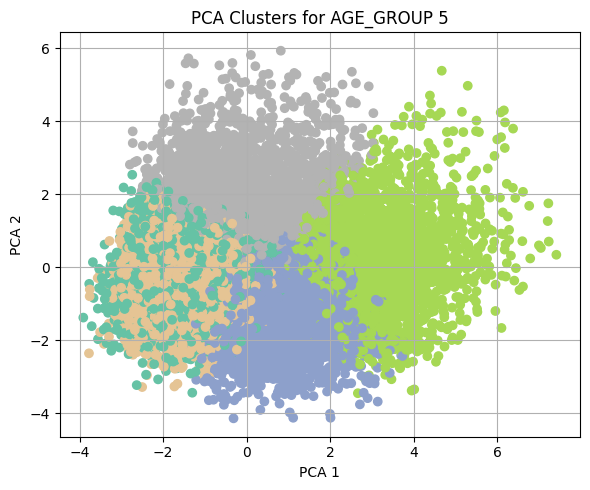

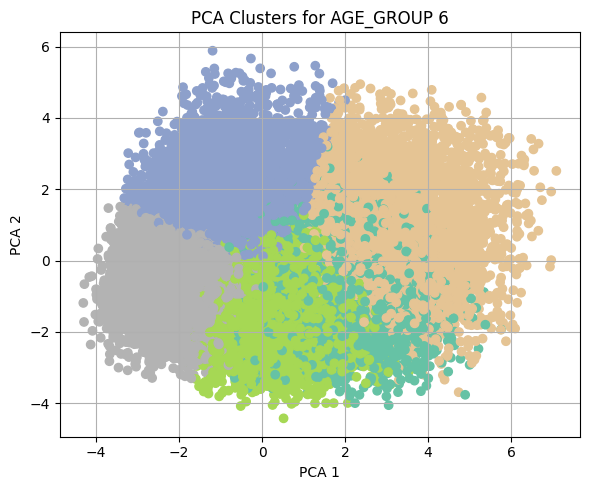

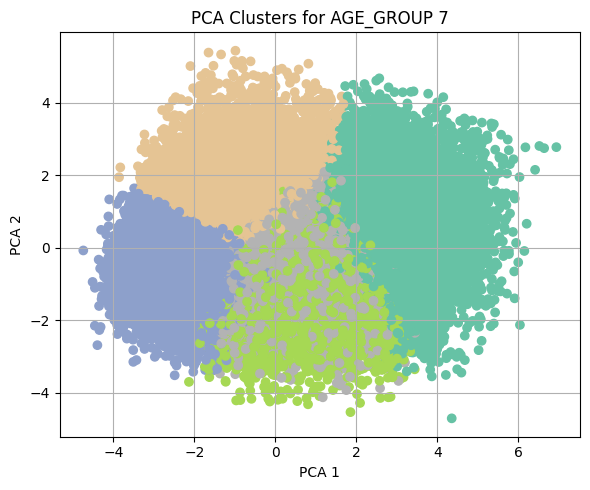

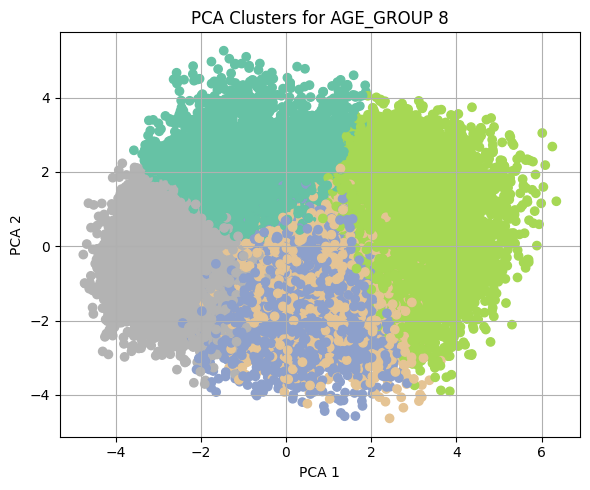

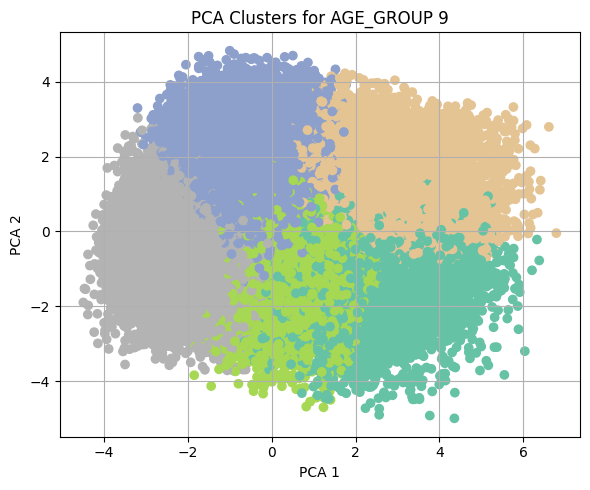

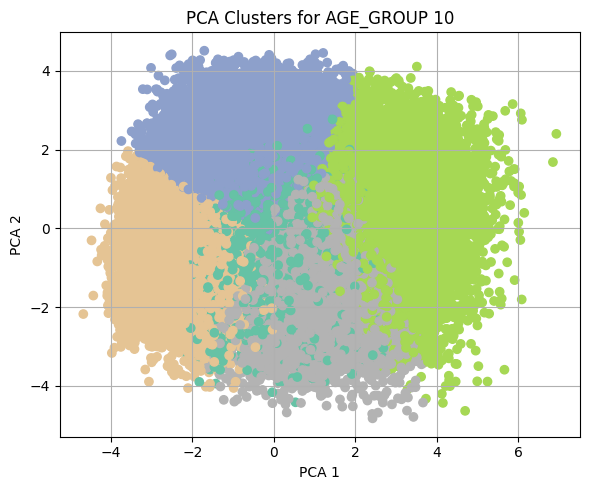

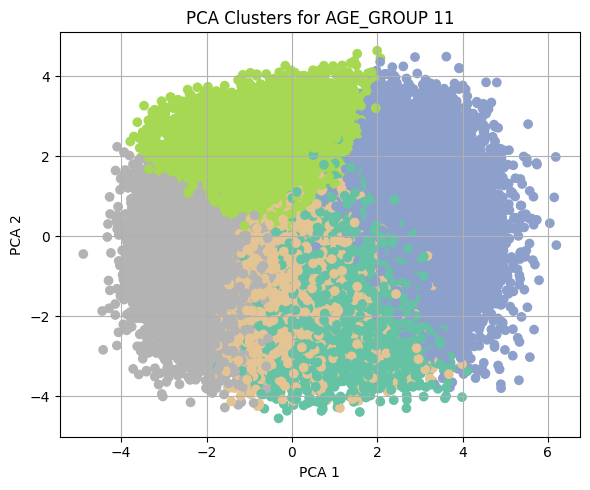

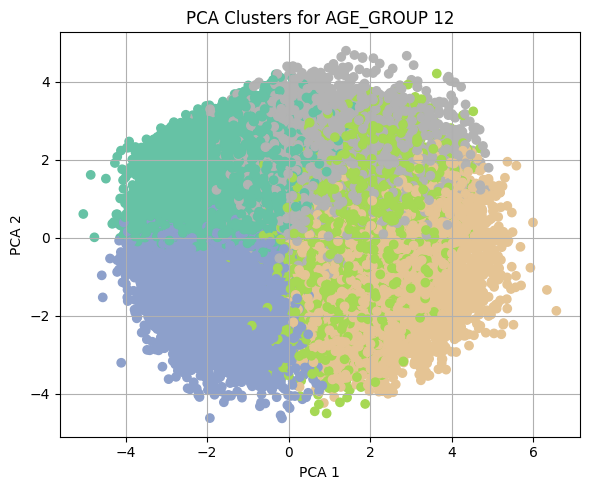

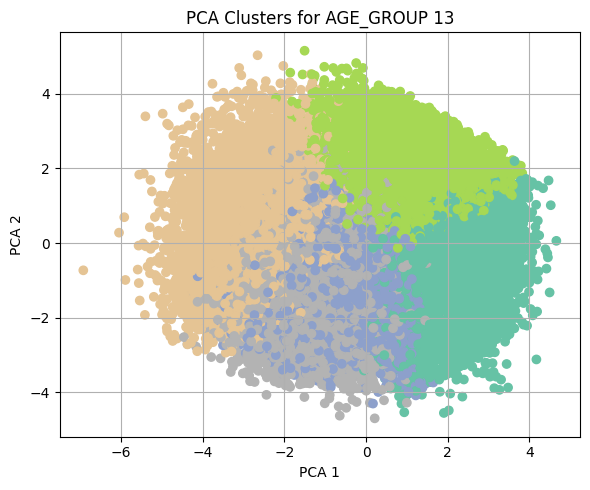

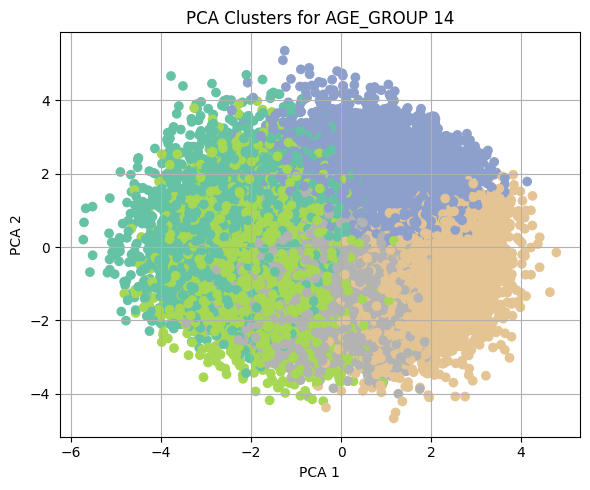

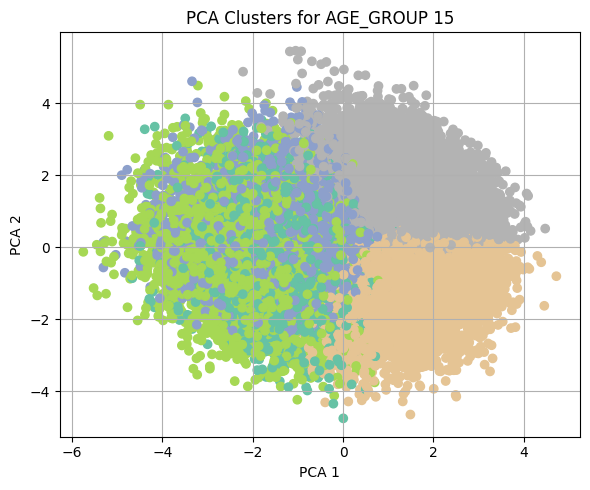

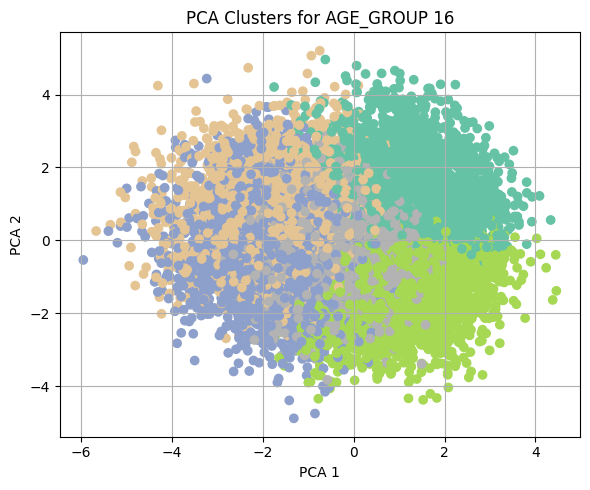

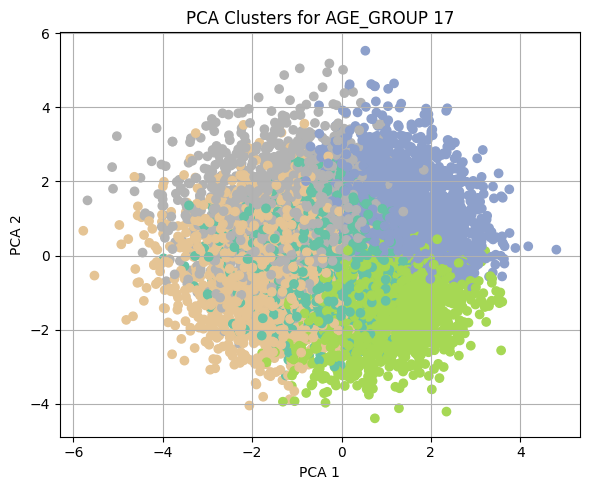

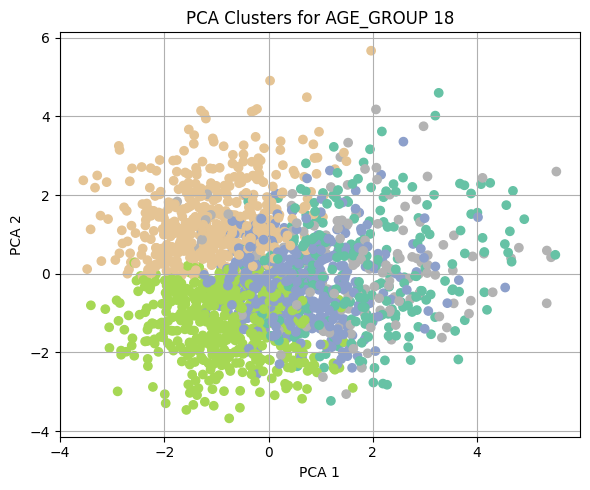

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# 1. 사용할 변수 목록
features = [
    'SEX', 'WAIST', 'BMI',
    'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE',
    'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP',
    'SMK_STAT_TYPE_CD', 'DRK_YN'
]

# 2. AGE_GROUP별 클러스터링
for age_group in sorted(df['AGE_GROUP'].unique()):
    df_age = df[df['AGE_GROUP'] == age_group].copy()
    df_age = df_age.dropna(subset=features)
    
    # 데이터가 너무 적으면 건너뜀
    if len(df_age) < 50:
        continue

    # 정규화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_age[features])
    
    # 클러스터링 (k=5 고정)
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # 결과 반영
    df.loc[df_age.index, 'cluster'] = clusters
    
    # 시각화 - PCA
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_scaled)
    plt.figure(figsize=(6, 5))
    plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='Set2')
    plt.title(f'PCA Clusters for AGE_GROUP {age_group}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
       # 그래프 파일 저장
    plt.savefig(f'PCA_cluster_{age_group}.png')  # 연령대별로 파일 저장
    plt.close()  # 그래프를 메모리에서 해제


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib
import pandas as pd

features = [
    'SEX', 'WAIST', 'BMI',
    'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE',
    'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP',
    'SMK_STAT_TYPE_CD', 'DRK_YN'
]

# 2. AGE_GROUP별 클러스터링
for age_group in sorted(df['AGE_GROUP'].unique()):
    df_age = df[df['AGE_GROUP'] == age_group].copy()
    df_age = df_age.dropna(subset=features)
    
    # 데이터가 너무 적으면 건너뜀
    if len(df_age) < 50:
        continue

    # 정규화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_age[features])
    
    # 클러스터링 (k=5 고정)
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # 클러스터 모델과 스케일러 저장
    joblib.dump(kmeans, f'kmeans_model_{age_group}.pkl')
    joblib.dump(scaler, f'scaler_{age_group}.pkl')

    # 클러스터 할당
    df_age['cluster'] = clusters
    
    # 클러스터별 평균 계산
    cluster_means = df_age.groupby('cluster')[features].mean()
    
    # 클러스터별 평균 CSV 파일로 저장
    cluster_means.to_csv(f'cluster_means_{age_group}.csv')


In [10]:
import joblib
# ✅ 반드시 이렇게 저장해야 transform 가능
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
joblib.dump(scaler, 'scaler.pkl')  # scaler 객체 자체 저장

['scaler.pkl']

In [11]:
import joblib
import pandas as pd

# 1. 모델과 정규화 도구 불러오기
model = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')  # 이거 반드시 저장돼 있어야 함
cluster_means = pd.read_csv('cluster_means.csv', index_col=0)

# 1. 사용자 입력
new_user = pd.DataFrame([{
    'AGE_GROUP': 7,
    'SEX': 2, 'WAIST': 100, 'BMI': 30.0,
    'TOT_CHOLE': 100, 'TRIGLYCERIDE': 130, 'HDL_CHOLE': 55,
    'LDL_CHOLE': 50, 'SGOT_AST': 22, 'SGPT_ALT': 20, 'GAMMA_GTP': 25,
    'SMK_STAT_TYPE_CD': 1, 'DRK_YN': 1
}])

# 1. AGE_GROUP 결정
age_group = new_user['AGE_GROUP'].values[0]

# 2. 해당 그룹의 모델과 스케일러 불러오기
model = joblib.load(f'kmeans_model_{age_group}.pkl')
scaler = joblib.load(f'scaler_{age_group}.pkl')
cluster_means = pd.read_csv(f'cluster_means_{age_group}.csv', index_col=0)

# ❗ features 순서 정확히 일치해야 함
features = [
    'SEX', 'WAIST', 'BMI',
    'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE',
    'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP',
    'SMK_STAT_TYPE_CD', 'DRK_YN'
]

# 2. 정규화
new_user_scaled = scaler.transform(new_user[features])


# 4. 클러스터 예측
cluster = model.predict(new_user_scaled)[0]
print(f"{age_group} 그룹에서 이 사용자는 {cluster}번 클러스터에 속합니다.")

7 그룹에서 이 사용자는 4번 클러스터에 속합니다.


📊 사용자 vs 클러스터 평균 비교:

                  사용자 값       집단 평균         차이
SEX                 2.0    1.182880   0.817120
WAIST             100.0   82.183729  17.816271
BMI                30.0   24.214119   5.785881
TOT_CHOLE         100.0  174.681239 -74.681239
TRIGLYCERIDE      130.0   93.144760  36.855240
HDL_CHOLE          55.0   55.088496  -0.088496
LDL_CHOLE          50.0  100.949913 -50.949913
SGOT_AST           22.0   20.713376   1.286624
SGPT_ALT           20.0   19.514765   0.485235
GAMMA_GTP          25.0   20.244354   4.755646
SMK_STAT_TYPE_CD    1.0    1.096603  -0.096603
DRK_YN              1.0    0.604710   0.395290


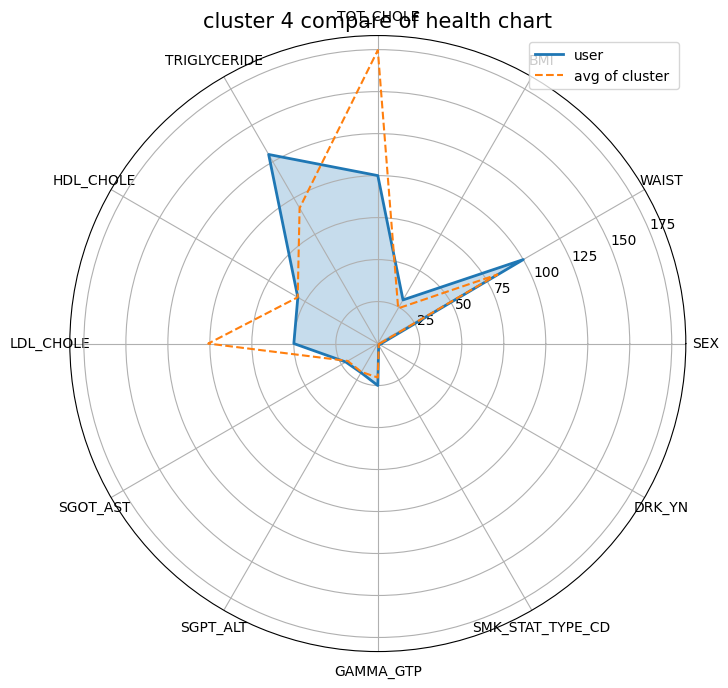

In [12]:
import joblib
import pandas as pd
import numpy as np

# 5. 리포트 생성
user_values = new_user.iloc[0][features]
cluster_avg_values = cluster_means.loc[cluster][features]

report = pd.DataFrame({
    "사용자 값": user_values,
    "집단 평균": cluster_avg_values,
    "차이": user_values - cluster_avg_values
})

print("📊 사용자 vs 클러스터 평균 비교:\n")
print(report)

# 6. Radar Chart 시각화
angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]

user_plot_vals = user_values.tolist()
cluster_plot_vals = cluster_avg_values.tolist()
user_plot_vals += [user_plot_vals[0]]
cluster_plot_vals += [cluster_plot_vals[0]]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, user_plot_vals, label='user', linewidth=2)
ax.plot(angles, cluster_plot_vals, label='avg of cluster ', linestyle='--')
ax.fill(angles, user_plot_vals, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), features, fontsize=10)
plt.title(f'cluster {cluster} compare of health chart', size=15)
plt.legend(loc='upper right')
plt.show()


In [20]:
def calculate_bmi(height_cm, weight_kg):
    """키(cm)와 몸무게(kg)를 이용하여 BMI를 계산합니다."""
    if height_cm <= 0:
        return None
    height_m = height_cm / 100.0
    bmi = weight_kg / (height_m ** 2)
    return bmi

def get_obesity_level(bmi):
    """BMI 값에 따라 비만 단계를 분류합니다."""
    if bmi is None:
        return "키 정보가 없어 BMI를 계산할 수 없습니다."
    elif bmi < 23.0:
        return "정상"
    elif 23.0 <= bmi < 25.0:
        return "비만전단계"
    elif 25.0 <= bmi < 30.0:
        return "1단계 비만"
    elif 30.0 <= bmi < 35.0:
        return "2단계 비만"
    else:
        return "3단계 비만(고도 비만)"

# new_user 데이터가 이미 존재하는 상태에서 BMI와 비만도 확인
user_bmi = new_user['BMI'].values[0]  # 이미 입력된 BMI 값 활용
obesity_level = get_obesity_level(user_bmi)

print("\n입력하신 정보를 바탕으로 BMI를 계산한 결과,")
print(f"당신의 BMI는 {user_bmi:.2f} kg/㎡ 이며,")
print(f"비만도는 '{obesity_level}' 단계에 해당합니다.")


입력하신 정보를 바탕으로 BMI를 계산한 결과,
당신의 BMI는 30.00 kg/㎡ 이며,
비만도는 '2단계 비만' 단계에 해당합니다.


In [13]:
import joblib
import pandas as pd

# 1. 사용자 입력 받은 후 해당 연령대에 맞는 모델과 스케일러 로드
age_group = new_user['AGE_GROUP'].values[0]

# 해당 연령대의 모델, 스케일러, 클러스터 평균 불러오기
model = joblib.load(f'kmeans_model_{age_group}.pkl')
scaler = joblib.load(f'scaler_{age_group}.pkl')
cluster_means = pd.read_csv(f'cluster_means_{age_group}.csv', index_col=0)


In [14]:
# 2. 사용자 데이터 정규화
new_user_scaled = scaler.transform(new_user[features])

# 3. 군집 예측
current_cluster = model.predict(new_user_scaled)[0]
print(f"이 사용자는 {age_group} 그룹에서 {current_cluster}번 클러스터에 속합니다.")


이 사용자는 7 그룹에서 4번 클러스터에 속합니다.


In [15]:
# 현재 군집의 평균 값 가져오기
current_cluster_values = cluster_means.loc[current_cluster, ['WAIST', 'TRIGLYCERIDE', 'TOT_CHOLE', 'HDL_CHOLE']]


In [16]:
# 미래 연령대 설정
future_age_group = age_group + 1

# 미래 연령대 군집 평균 로드
future_cluster_means = pd.read_csv(f'cluster_means_{future_age_group}.csv', index_col=0)


In [17]:
from sklearn.metrics import pairwise_distances
import numpy as np

# 현재 군집의 건강 지표 (WAIST, TRIGLYCERIDE) 값
current_values = current_cluster_values[['WAIST', 'TRIGLYCERIDE']].values.reshape(1, -1)

# 미래 연령대 군집들의 WAIST, TRIGLYCERIDE 값
future_values = future_cluster_means[['WAIST', 'TRIGLYCERIDE']].values

# 유클리드 거리 계산
distances = pairwise_distances(current_values, future_values)

# 가장 가까운 군집 찾기 (유클리드 거리 기준)
closest_cluster_index = np.argmin(distances)


In [18]:
# 미래 군집의 평균 값
future_values = future_cluster_means.iloc[closest_cluster_index][['WAIST', 'TRIGLYCERIDE', 'TOT_CHOLE', 'HDL_CHOLE']]

# 변화량 계산 (WAIST, TRIGLYCERIDE, TOT_CHOLE, HDL_CHOLE)
comparison_results = {
    'waist_change': future_values['WAIST'] - current_cluster_values['WAIST'],
    'triglyceride_change': future_values['TRIGLYCERIDE'] - current_cluster_values['TRIGLYCERIDE'],
    'tot_cho_change': future_values['TOT_CHOLE'] - current_cluster_values['TOT_CHOLE'],
    'hdl_change': future_values['HDL_CHOLE'] - current_cluster_values['HDL_CHOLE']
}


In [19]:
# 리포트 생성
report = f"## 군집 비교 리포트\n\n"
report += f"**현재 연령대 (AGE_GROUP {age_group})**\n"
report += f"**현재 군집 {current_cluster}**와 **미래 연령대 (AGE_GROUP {future_age_group}) 군집 {closest_cluster_index}** 비교\n\n"

report += f"**변화량:**\n"
report += f"- WAIST 변화량: {comparison_results['waist_change']:.2f} cm\n"
report += f"- TRIGLYCERIDE 변화량: {comparison_results['triglyceride_change']:.2f} mg/dL\n"
report += f"- TOT_CHOLE 변화량: {comparison_results['tot_cho_change']:.2f} mg/dL\n"
report += f"- HDL_CHOLE 변화량: {comparison_results['hdl_change']:.2f} mg/dL\n\n"

report += "이 분석은 현재와 미래의 군집 간 변화량을 기반으로 진행되었습니다. 추가적인 건강 데이터를 반영하면 더 정확한 분석이 가능합니다."

# 출력
print(report)


## 군집 비교 리포트

**현재 연령대 (AGE_GROUP 7)**
**현재 군집 4**와 **미래 연령대 (AGE_GROUP 8) 군집 1** 비교

**변화량:**
- WAIST 변화량: -3.43 cm
- TRIGLYCERIDE 변화량: 4.67 mg/dL
- TOT_CHOLE 변화량: 2.53 mg/dL
- HDL_CHOLE 변화량: 2.63 mg/dL

이 분석은 현재와 미래의 군집 간 변화량을 기반으로 진행되었습니다. 추가적인 건강 데이터를 반영하면 더 정확한 분석이 가능합니다.
